In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats as ss
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\tcdml1920-rec-click-pred--submission file (example).csv
.\tcdml1920-rec-click-pred--submission file.csv
.\tcdml1920-rec-click-pred--test.csv
.\tcdml1920-rec-click-pred--training.csv
.\Untitled.ipynb
.\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [4]:
raw_train_df = pd.read_csv("tcdml1920-rec-click-pred--training.csv")
raw_train_df.describe()

,recommendation_set_id,organization_id,hour_request_received,rec_processing_time,number_of_recs_in_set,clicks,ctr,set_clicked
count,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000
mean,255927.413200,2.055848,12.796205,4.139454,5.832043,0.025285,0.004334,0.017535
std,119099.697905,1.777107,6.205718,61.643860,1.779673,0.233605,0.040158,0.131254
min,46897.000000,1.000000,0.000000,0.005667,1.000000,0.000000,0.000000,0.000000
25%,155516.500000,1.000000,9.000000,0.274834,3.000000,0.000000,0.000000,0.000000
50%,259046.000000,1.000000,13.000000,2.561020,7.000000,0.000000,0.000000,0.000000
75%,357939.500000,4.000000,18.000000,5.691500,7.000000,0.000000,0.000000,0.000000
max,459536.000000,8.000000,23.000000,17064.400000,7.000000,19.000000,2.714300,1.000000


(array([378924.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   6763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

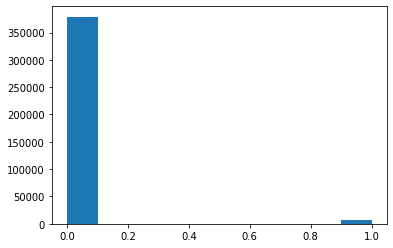

In [5]:
plt.hist(raw_train_df['set_clicked'])

In [13]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385687 entries, 0 to 385686
Data columns (total 46 columns):
recommendation_set_id               385687 non-null int64
user_id                             385687 non-null object
session_id                          385687 non-null object
query_identifier                    385687 non-null object
query_word_count                    385687 non-null object
query_char_count                    385687 non-null object
query_detected_language             385687 non-null object
query_document_id                   385687 non-null object
document_language_provided          385687 non-null object
year_published                      385687 non-null object
number_of_authors                   385687 non-null object
abstract_word_count                 385687 non-null object
abstract_char_count                 385687 non-null object
abstract_detected_language          385609 non-null object
first_author_id                     385687 non-null object
num_p

In [30]:
for col in raw_train_df.columns:
    if '\\N' in raw_train_df[col].value_counts().index:
        print(col ,': ' , raw_train_df[col].value_counts().loc['\\N'])

user_id :  333849
session_id :  333849
query_identifier :  154
query_word_count :  154
query_char_count :  154
query_detected_language :  3597
query_document_id :  220470
document_language_provided :  381260
year_published :  315710
number_of_authors :  316412
abstract_word_count :  238869
abstract_char_count :  238869
abstract_detected_language :  238869
first_author_id :  319231
num_pubs_by_first_author :  319231
item_type :  36223
app_version :  115523
app_lang :  16617
user_os :  384369
user_os_version :  385674
user_java_version :  385680
user_timezone :  384363
country_by_ip :  1574
timezone_by_ip :  76209
local_time_of_request :  85059
local_hour_of_request :  85059
recommendation_algorithm_id_used :  10677
cbf_parser :  110616
time_recs_recieved :  330975
time_recs_displayed :  331317
time_recs_viewed :  372540


In [149]:
for col in raw_train_df.columns:
    if '\\N' in raw_train_df[col].value_counts().index:
        print(col ,': ' , raw_train_df[col].value_counts().loc['\\N'])

user_id :  333849
session_id :  333849
query_identifier :  154
query_word_count :  154
query_char_count :  154
query_detected_language :  3597
query_document_id :  220470
document_language_provided :  381260
year_published :  315710
number_of_authors :  316412
abstract_word_count :  238869
abstract_char_count :  238869
abstract_detected_language :  238869
first_author_id :  319231
num_pubs_by_first_author :  319231
item_type :  36223
app_version :  115523
app_lang :  16617
user_os :  384369
user_os_version :  385674
user_java_version :  385680
user_timezone :  384363
country_by_ip :  1574
timezone_by_ip :  76209
local_time_of_request :  85059
local_hour_of_request :  85059
cbf_parser :  110616
time_recs_recieved :  330975
time_recs_displayed :  331317
time_recs_viewed :  372540


In [164]:
raw_train_df['algorithm_class'].value_counts()

content_based_filtering    275071
sentence_embeddings         81931
unknown                     13026
stereotype                  10735
same_author                  4600
random                        324
Name: algorithm_class, dtype: int64

In [46]:
raw_train_df[raw_train_df['recommendation_algorithm_id_used'] =='\\N']

,recommendation_set_id,user_id,session_id,query_identifier,query_word_count,query_char_count,query_detected_language,query_document_id,document_language_provided,year_published,...,cbf_parser,search_title,search_keywords,search_abstract,time_recs_recieved,time_recs_displayed,time_recs_viewed,clicks,ctr,set_clicked
603,47524,\N,\N,Withheld for privacy,5,42,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
1279,48214,\N,\N,Withheld for privacy,2,14,sw,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
3829,50842,\N,\N,Withheld for privacy,5,25,en,80296321,\N,2005,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
4168,51188,\N,\N,Withheld for privacy,7,56,en,13644745,\N,2010,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
4469,51501,\N,\N,Withheld for privacy,11,73,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55000,104529,\N,\N,Withheld for privacy,15,94,en,36153704,\N,2014,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
55008,104550,\N,\N,Withheld for privacy,10,57,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
55009,104551,\N,\N,Withheld for privacy,12,103,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,1,0.1429,1
99853,160352,\N,\N,Withheld for privacy,33,220,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0


In [152]:
raw_train_df[raw_train_df['algorithm_class']=='unknown']['time_recs_viewed'].value_counts()

\N                  12327
15/09/2019 18:14        2
19/09/2019 15:26        2
29/09/2019 13:59        2
06/10/2019 17:12        2
                    ...  
01/10/2019 14:56        1
24/09/2019 16:01        1
18/09/2019 15:52        1
06/10/2019 02:01        1
25/09/2019 00:52        1
Name: time_recs_viewed, Length: 689, dtype: int64

In [158]:
raw_train_df[raw_train_df['time_recs_viewed']!='\\N']['application_type'].value_counts()

e-commerce         8728
blog               4341
digital_library      71
0                     7
Name: application_type, dtype: int64

In [135]:
raw_train_df[['algorithm_class', 'recommendation_algorithm_id_used', 'set_clicked']].groupby(['algorithm_class', 'recommendation_algorithm_id_used']).count().reset_index()

,algorithm_class,recommendation_algorithm_id_used,set_clicked
0,content_based_filtering,1,37953
1,content_based_filtering,2,68514
2,content_based_filtering,6,5979
3,content_based_filtering,7,20877
4,content_based_filtering,8,23396
5,content_based_filtering,9,6288
6,content_based_filtering,10,9080
7,content_based_filtering,11,32019
8,content_based_filtering,12,20399
9,content_based_filtering,13,23595


In [85]:
raw_train_df['clicks'].value_counts()

0     378924
1       5049
2       1065
3        367
4        138
5         57
6         39
7         28
10         5
9          5
8          5
11         3
19         1
18         1
Name: clicks, dtype: int64

In [87]:
raw_train_df[raw_train_df['set_clicked']==1]['number_of_recs_in_set'].value_counts()

7    5388
3    1068
5     207
6      41
2      23
4      20
1      16
Name: number_of_recs_in_set, dtype: int64

In [139]:
raw_train_df['application_type'].value_counts()

digital_library    270145
e-commerce         100070
blog                15212
0                     260
Name: application_type, dtype: int64

In [72]:
raw_train_df['recommendation_algorithm_id_used'] = raw_train_df['recommendation_algorithm_id_used'].replace('\\N', -1).astype('int64')

In [102]:
for app in ['e-commerce', 'blog']:
    print('App: ', app, ', Categories: ', len(raw_train_df[raw_train_df['application_type']==app]['query_identifier'].value_counts()))

App:  e-commerce , Categories:  30353
App:  blog , Categories:  324


In [104]:
for app in set(raw_train_df['application_type']):
    print('App: ', app, ', Categories: ', len(raw_train_df[raw_train_df['application_type']==app]['query_document_id'].value_counts()))

App:  e-commerce , Categories:  8295
App:  blog , Categories:  190
App:  digital_library , Categories:  55295
App:  0 , Categories:  8


In [122]:
raw_train_df[raw_train_df['application_type']=='blog']['query_document_id'].value_counts()

124015831    2004
124015835    1589
124015816    1490
124015830     714
124015836     562
             ... 
124017228       1
124016840       1
124017315       1
124017175       1
124016115       1
Name: query_document_id, Length: 190, dtype: int64

In [129]:
set(raw_train_df[(raw_train_df['application_type']=='blog') & (raw_train_df['query_document_id']=='124015816')]['query_identifier'])

{'Google File Stream: A Horror Story with Corrupted Files and More | Prof. Joeran Beel (TCD Dublin)',
 'Google File Stream: A Horror Story with Corrupted Files and More | | Prof. Joeran Beel (TCD Dublin)'}

In [163]:
raw_train_df[(raw_train_df['search_title']=='yes') & (raw_train_df['query_document_id']!='\\N')]['application_type'].value_counts()

digital_library    52698
e-commerce         51880
blog               10522
0                     27
Name: application_type, dtype: int64

In [ ]:
raw_train_df[]